# Analyzing Austin PD's Crime Reports Dataset

The dataset is available from the Austin Police Department on https://data.austintexas.gov/Public-Safety/Crime-Reports/fdj4-gpfu.


## Table of Contents 

    I. Introduction
    II. Data Scrubbing
    III. Exploratory Analysis 
    
    Questions:
><ul>
><li><a href="#q1"> 1. What areas of Austin have the highest crime rates?</a></li>
><li><a href="#q2"> 2. How is crime distributed in 78701?</a></li> 
><li><a href="#q3"> 3. How is crime distributed in 78753?</a></li>     
><li><a href="#q4"> 4. How is crime distributed in 78741?</a></li>
><li><a href="#q5"> 5. How is crime distributed in 78745?</a></li>
><li><a href="#q6"> 6. How is crime distributed in 78705?</a></li>
><li><a href="#q7"> 7. How is crime distributed in 78746?</a></li>
><li><a href="#q8"> 8. How are violent crimes, in particular murder, capital murder, armed robbery, aggrivated assault, and rape distributed?
><li><a href="#q9"> 9. How is crime distributed across different districts and sectors around Austin? Location types?
><li><a href="#q10"> 10. How is crime distributed across different
><li><a href="#q11"> 11. How does violent crime appear on the map?
><li><a href="#q12"> 12. Are there any addresses where violent crime and murder occurs frequently?
</a></li>

## I. Introduction

I began reviewing the Crime Reports dataset, provided by the Austin PD, around the same time I began reviewing its Hate Crimes datasets for analysis, at the beginning of 2020. This is a rather large dataset, containing over 2 million records, spanning from 2003 to the present, and is updated weekly. 

This is a self-paced project, conceived outside of both work and the educational arenas. It is my hope that this project will reveal some actionable insights that will benefit the Austin law enforcement community, news outlets, and anyone else interested in gaining knowledge on how best to combat the problem of crime in the Austin area.

I first attempted importing the data into this notebook using Sodapy's Socrata API method but found it lacking. It didn't import the entire dataset, and added several redundant columns. I, therefore, prefer to manually download the entire dataset and re-download each week after it's updated.

In [1]:
# importing necessary libraries and configurations
import folium
from folium import plugins

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import itertools
import warnings

plt.style.use("seaborn")
pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# loading the data
df = pd.read_csv("Crime_Reports.csv")

In [3]:
# examining the dataframe
display(df.info())
display(df.isnull().sum())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2316454 entries, 0 to 2316453
Data columns (total 27 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Incident Number              int64  
 1   Highest Offense Description  object 
 2   Highest Offense Code         int64  
 3   Family Violence              object 
 4   Occurred Date Time           object 
 5   Occurred Date                object 
 6   Occurred Time                float64
 7   Report Date Time             object 
 8   Report Date                  object 
 9   Report Time                  float64
 10  Location Type                object 
 11  Address                      object 
 12  Zip Code                     float64
 13  Council District             float64
 14  APD Sector                   object 
 15  APD District                 object 
 16  PRA                          object 
 17  Census Tract                 float64
 18  Clearance Status             object 
 19  

None

Incident Number                      0
Highest Offense Description          0
Highest Offense Code                 0
Family Violence                      0
Occurred Date Time                 165
Occurred Date                        0
Occurred Time                       84
Report Date Time                     1
Report Date                          0
Report Time                          1
Location Type                    21065
Address                             12
Zip Code                         14289
Council District                 47284
APD Sector                        9087
APD District                      9567
PRA                              10841
Census Tract                   1624471
Clearance Status                607488
Clearance Date                  338290
UCR Category                   1525309
Category Description           1525309
X-coordinate                     10250
Y-coordinate                     10250
Latitude                         39152
Longitude                

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,20191571574,FRAUD - OTHER,1199,N,06/03/2019 04:00:00 PM,06/03/2019,1600.0,06/06/2019 05:34:00 PM,06/06/2019,1734.0,DEPARTMENT / DISCOUNT STORE,10817 BALLARD PATH,78717.0,6.0,AD,5,573.0,203.11,NaN,NaN,NaN,NaN,3097785.0,3097785.0,30.483646,-97.789495,"(30.48364631, -97.7894953)"
1,20191550153,DEADLY CONDUCT,408,N,06/04/2019 03:12:00 AM,06/04/2019,312.0,06/04/2019 03:16:00 AM,06/04/2019,316.0,RESIDENCE / HOME,8312 N IH 35 SVRD SB,78753.0,4.0,ED,1,250.0,18.06,N,06/06/2019,13A,Aggravated Assault,3128227.0,3128227.0,30.346646,-97.696573,"(30.34664576, -97.69657342)"
2,20195022816,THEFT OF LICENSE PLATE,614,N,06/03/2019 03:00:00 PM,06/03/2019,1500.0,06/04/2019 03:22:00 PM,06/04/2019,1522.0,RESIDENCE / HOME,6312 LIBYAN DR,78745.0,2.0,FR,4,509.0,24.09,N,06/04/2019,23G,Theft,3098393.0,3098393.0,30.205267,-97.794900,"(30.20526729, -97.79490043)"
3,20205007833,RUNAWAY CHILD,4100,N,02/22/2020 06:00:00 PM,02/22/2020,1800.0,02/24/2020 06:03:00 PM,02/24/2020,1803.0,RESIDENCE / HOME,13012 DEARBONNE DR,78617.0,2.0,HE,7,612.0,NaN,N,03/03/2020,NaN,NaN,3155456.0,3155456.0,30.176140,-97.615031,"(30.17613952, -97.6150307)"
4,20191671388,BURGLARY OF RESIDENCE,500,N,06/14/2019 12:00:00 PM,06/14/2019,1200.0,06/16/2019 10:00:00 PM,06/16/2019,2200.0,RESIDENCE / HOME,3809 SPICEWOOD SPRINGS RD EB,78731.0,10.0,BA,8,256.0,17.51,N,09/18/2019,220,Burglary,3111039.0,3111039.0,30.364987,-97.750587,"(30.36498691, -97.75058749)"


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
2316449,20215007223,IDENTITY THEFT,4022,N,02/24/2021 12:00:00 PM,02/24/2021,1200.0,02/25/2021 09:21:00 AM,02/25/2021,921.0,OTHER / UNKNOWN,1419 BERKSHIRE DR,78723.0,1.0,ID,5,293.0,NaN,N,02/26/2021,NaN,NaN,3128690.0,3128690.0,30.316458,-97.695931,"(30.31645819, -97.69593054)"
2316450,20161211213,ASSAULT BY THREAT,901,N,04/30/2016 03:00:00 PM,04/30/2016,1500.0,04/30/2016 04:01:00 PM,04/30/2016,1601.0,RESIDENCE / HOME,9301 OLD BEE CAVES RD,78735.0,NaN,DA,6,45.0,NaN,N,05/04/2016,NaN,NaN,3064189.0,3064189.0,30.259883,-97.901829,"(30.25988292, -97.90182915)"
2316451,20043141761,VOCO AMPLIFIED MUSIC/VEHICLE,3218,N,11/09/2004 10:00:00 PM,11/09/2004,2200.0,11/09/2004 10:00:00 PM,11/09/2004,2200.0,STREETS / HWY / ROAD / ALLEY,N LAMAR BLVD / PAYTON GIN RD,78753.0,4.0,ED,1,237.0,NaN,C,11/29/2004,NaN,NaN,3127016.0,3127016.0,30.357646,-97.700113,"(30.35764573, -97.70011339)"
2316452,20135039080,BURGLARY OF VEHICLE,601,N,08/25/2013 11:00:00 PM,08/25/2013,2300.0,08/26/2013 05:04:00 PM,08/26/2013,1704.0,STREETS / HWY / ROAD / ALLEY,1405 BLAKENEY LN,78753.0,1.0,ED,7,223.0,NaN,N,08/27/2013,23F,Theft,3140141.0,3140141.0,30.383847,-97.657761,"(30.38384684, -97.65776054)"
2316453,2021541567,ASSAULT BY THREAT,901,N,02/23/2021 11:11:00 PM,02/23/2021,2311.0,02/23/2021 11:11:00 PM,02/23/2021,2311.0,RESIDENCE / HOME,9010 GALEWOOD DR,78758.0,4.0,ED,2,235.0,NaN,C,02/24/2021,NaN,NaN,3122208.0,3122208.0,30.367942,-97.715082,"(30.36794153, -97.71508242)"


## II. Data Prep

There are several columns we don't need which we'll drop. We'll index the data according to the OCCURRED DATE TIME column. The following code creates a reproducible script for scrubbing and parsing the data.

In [4]:
def clean_data(df):
    drop_col = [
        "Incident Number",
        "Occurred Time",
        "Occurred Date Time",
        "Highest Offense Code",
        "Census Tract",
        "PRA",
        "Report Date",
        "Report Time",
        "UCR Category",
        "Category Description",
        "X-coordinate",
        "Y-coordinate",
        "Location",
    ]
    df.drop(drop_col, axis=1, inplace=True)
    df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
    fillna = [
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
        "clearance_status",
    ]
    df[fillna].fillna("N/A", inplace=True)
    date_col = ["occurred_date", "report_date_time", "clearance_date"]
    cat_col = [
        "highest_offense_description",
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
    ]
    df[date_col] = df[date_col].astype("datetime64")
    df[cat_col] = df[cat_col].astype("category")
    df["year"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.year
    df["month"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.month
    df["week"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.week
    df["day"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.day
    df.set_index(["occurred_date"], inplace=True)
    df.sort_index(inplace=True)
    return df


df = clean_data(df)

In [5]:
# Checking for and removing any duplicates
df.duplicated().sum()

834

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [7]:
# Re-examining the dataframe
display(df.info())
display(df.isnull().sum())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2315620 entries, 2003-01-01 to 2021-03-13
Data columns (total 17 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   highest_offense_description  category      
 1   family_violence              object        
 2   report_date_time             datetime64[ns]
 3   location_type                category      
 4   address                      object        
 5   zip_code                     category      
 6   council_district             category      
 7   apd_sector                   category      
 8   apd_district                 category      
 9   clearance_status             object        
 10  clearance_date               datetime64[ns]
 11  latitude                     float64       
 12  longitude                    float64       
 13  year                         int64         
 14  month                        int64         
 15  week                         int64

None

highest_offense_description         0
family_violence                     0
report_date_time                    1
location_type                   21054
address                            12
zip_code                        14284
council_district                47266
apd_sector                       9083
apd_district                     9563
clearance_status               607252
clearance_date                 338129
latitude                        39124
longitude                       39124
year                                0
month                               0
week                                0
day                                 0
dtype: int64

,highest_offense_description,family_violence,report_date_time,location_type,address,zip_code,council_district,apd_sector,apd_district,clearance_status,clearance_date,latitude,longitude,year,month,week,day
occurred_date,,,,,,,,,,,,,,,,,
2003-01-01,IDENTITY THEFT,N,2006-03-28 15:55:00,COMMERCIAL / OFFICE BUILDING,8100 RESEARCH NB SVC RD,78758.0,4.0,ID,1,NaN,2006-07-07,30.353512,-97.714361,2003,1,1,1
2003-01-01,HARASSMENT,N,2004-04-30 17:19:00,RESIDENCE / HOME,5108 EILERS AVE,78751.0,9.0,ID,6,NaN,2004-06-03,30.313580,-97.717077,2003,1,1,1
2003-01-01,PURSE SNATCHING,N,2003-01-02 16:53:00,STREETS / HWY / ROAD / ALLEY,100 W 4TH ST,78701.0,9.0,GE,1,N,NaT,30.266437,-97.743668,2003,1,1,1
2003-01-01,ASSAULT BY THREAT,N,2003-01-27 15:05:00,RESIDENCE / HOME,3204 FRENCH PL,78722.0,9.0,CH,3,N,NaT,30.288202,-97.718691,2003,1,1,1
2003-01-01,IDENTITY THEFT,N,2008-03-24 14:16:00,RESIDENCE / HOME,1601 E CESAR CHAVEZ ST,78702.0,3.0,CH,1,NaN,2008-03-25,30.258241,-97.728573,2003,1,1,1


,highest_offense_description,family_violence,report_date_time,location_type,address,zip_code,council_district,apd_sector,apd_district,clearance_status,clearance_date,latitude,longitude,year,month,week,day
occurred_date,,,,,,,,,,,,,,,,,
2021-03-13,DISTURBANCE - OTHER,N,2021-03-14 00:35:00,RESIDENCE / HOME,12102 ARROWWOOD DR,78727.0,7.0,AD,3,NaN,NaT,30.418314,-97.728185,2021,3,10,13
2021-03-13,HARASSMENT,Y,2021-03-13 09:38:00,RESIDENCE / HOME,1700 TERI RD,78744.0,2.0,FR,5,NaN,NaT,30.205243,-97.755666,2021,3,10,13
2021-03-13,FRAUD - OTHER,N,2021-03-13 21:45:00,GROCERY / SUPERMARKET,2508 E RIVERSIDE DR,78741.0,3.0,HE,2,NaN,NaT,30.235814,-97.722624,2021,3,10,13
2021-03-13,BURGLARY NON RESIDENCE,N,2021-03-13 01:27:00,OTHER / UNKNOWN,11150 RESEARCH BLVD SB,78759.0,10.0,AD,7,NaN,NaT,30.401177,-97.746017,2021,3,10,13
2021-03-13,HARASSMENT,Y,2021-03-13 21:15:00,RESIDENCE / HOME,2301 DURWOOD ST,78704.0,9.0,DA,1,NaN,NaT,30.242000,-97.756886,2021,3,10,13


## III. Exploratory Analysis

<a id='q1'></a>
### A. What areas of Austin have the highest crime rates? 

78741.0    207740
78753.0    180629
78701.0    169033
78758.0    159858
78704.0    155545
78745.0    151656
78702.0    137022
78744.0    127010
78723.0    119692
78752.0     84956
78748.0     68620
78759.0     66857
78751.0     64379
78757.0     58241
78705.0     57492
78721.0     47375
78749.0     40698
78724.0     37979
78727.0     36129
78703.0     35411
78731.0     28897
78746.0     28245
78729.0     25512
78750.0     23847
78754.0     23064
Name: zip_code, dtype: int64

78741.0    0.090269
78753.0    0.078489
78701.0    0.073450
78758.0    0.069463
78704.0    0.067589
78745.0    0.065899
78702.0    0.059540
78744.0    0.055190
78723.0    0.052010
78752.0    0.036916
78748.0    0.029817
78759.0    0.029051
78751.0    0.027975
78757.0    0.025307
78705.0    0.024982
78721.0    0.020586
78749.0    0.017685
78724.0    0.016503
78727.0    0.015699
78703.0    0.015387
78731.0    0.012557
78746.0    0.012273
78729.0    0.011086
78750.0    0.010362
78754.0    0.010022
Name: zip_code, dtype: float64

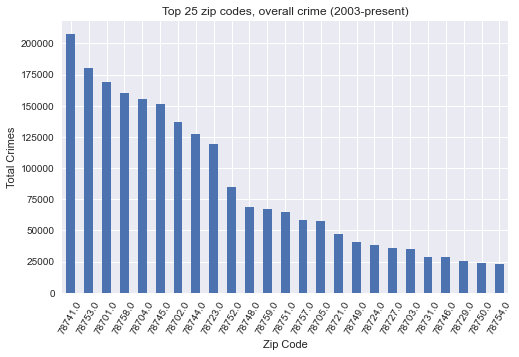

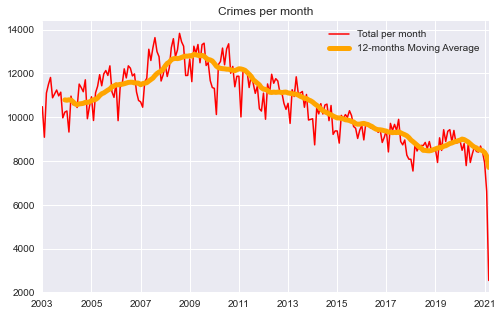

In [8]:
# Create and display dataframes for crime rates by zipcode and as percentages
display(df.zip_code.value_counts().head(25))
display(df.zip_code.value_counts(normalize=True).head(25))

# Visualizing the top 25 crime-ridden zip codes in Austin
df.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zip codes, overall crime (2003-present)",
    figsize=(8, 5),
    xlabel="Zip Code",
    ylabel="Total Crimes",
    rot=60,
)
plt.show()

# Creating a time series plot with a 12 month rolling average
plt.figure(figsize=(8, 5))
df.resample("M").size().plot(color="red", linewidth=1.5, label="Total per month")
df.resample("M").size().rolling(window=12).mean().plot(
    color="orange", linewidth=5, label="12-months Moving Average"
)
plt.title("Crimes per month")
plt.xlabel("")
plt.legend()
plt.show()

### B. Examining the top crime types in Austin 

BURGLARY OF VEHICLE               231674
THEFT                             212472
FAMILY DISTURBANCE                180632
CRIMINAL MISCHIEF                 128060
ASSAULT W/INJURY-FAM/DATE VIOL     78428
BURGLARY OF RESIDENCE              77309
DWI                                69829
PUBLIC INTOXICATION                68837
HARASSMENT                         64556
DISTURBANCE - OTHER                61899
Name: highest_offense_description, dtype: int64

,BURGLARY OF VEHICLE,HARASSMENT,FAMILY DISTURBANCE,BURGLARY OF RESIDENCE,PUBLIC INTOXICATION,ASSAULT W/INJURY-FAM/DATE VIOL,CRIMINAL MISCHIEF,DWI,TOTAL
occurred_date,,,,,,,,,
2020-11-30,482,238,864,162,71,282,507,184,2790
2020-12-31,409,248,825,187,50,253,478,165,2615
2021-01-31,362,243,815,127,55,256,432,169,2459
2021-02-28,313,159,808,117,62,239,328,132,2158
2021-03-31,199,62,133,67,16,91,113,63,744


<Figure size 432x288 with 0 Axes>

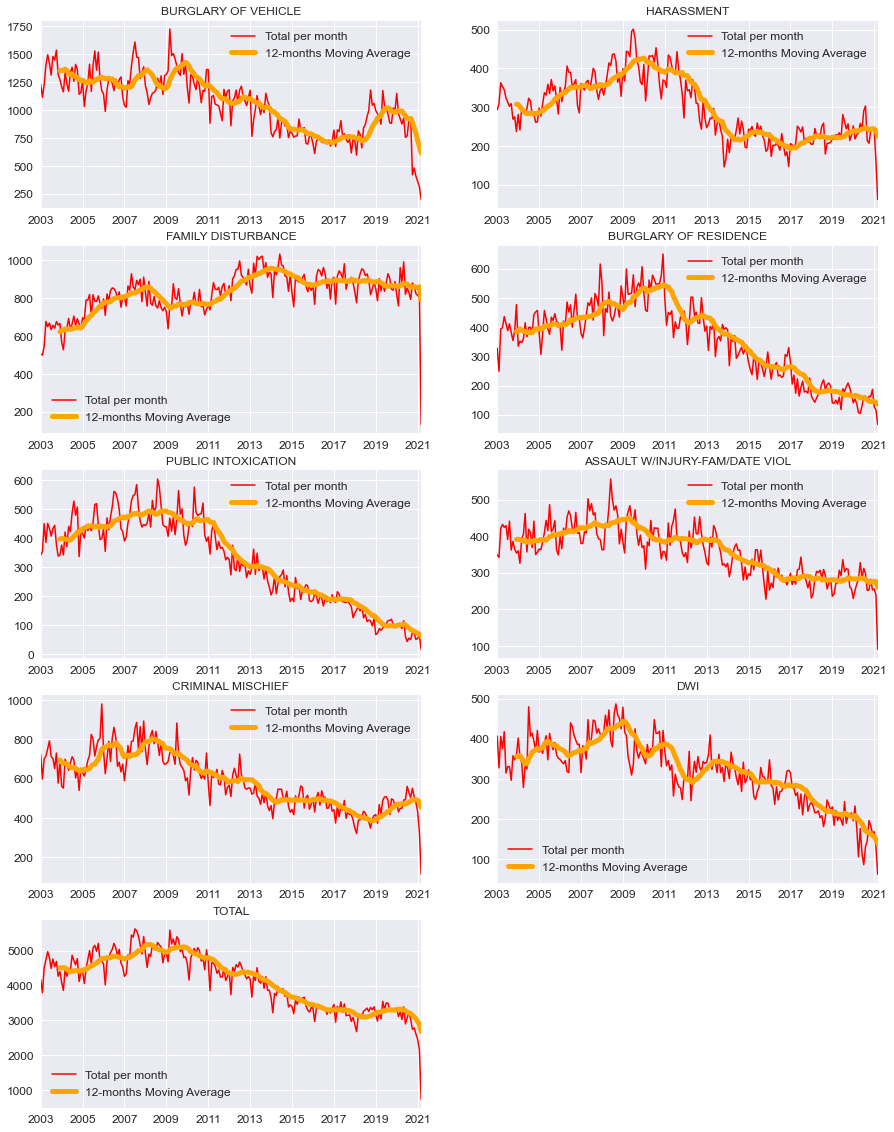

In [9]:
display(df["highest_offense_description"].value_counts().head(10))

df2 = df.query(
    'highest_offense_description == ["BURGLARY OF VEHICLE", "FAMILY DISTURBANCE", "CRIMINAL MISCHIEF", "ASSAULT W/INJURY-FAM/DATE VIOL", "BURGLARY OF RESIDENCE", "DWI", "PUBLIC INTOXICATION", "HARASSMENT"]'
)

monthly = pd.DataFrame(
    df2[df2["highest_offense_description"] == "BURGLARY OF VEHICLE"]
    .resample("M")
    .size()
)
monthly.columns = ["BURGLARY OF VEHICLE"]

for i in df2["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df2[df2["highest_offense_description"] == i].resample("M").size()
    )

monthly["TOTAL"] = monthly.sum(axis=1)

crimeType = monthly.columns

display(monthly.tail())

plt.figure(1)
plt.figure(figsize=(15, 20))

i = 521
for eachCrime in crimeType:
    plt.subplot(i)
    monthly[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12-months Moving Average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1
plt.show()

<a id='q2'></a>
### C. How is crime distributed in 78701 (downtown Austin)? 

PUBLIC INTOXICATION               17163
THEFT                             15824
BURGLARY OF VEHICLE                9285
WARRANT ARREST NON TRAFFIC         8965
DWI                                8342
ASSAULT WITH INJURY                7563
VIOL CITY ORDINANCE - OTHER        6186
POSS OF DRUG PARAPHERNALIA         6059
CRIMINAL MISCHIEF                  5844
CRIMINAL TRESPASS                  3929
POSSESSION OF MARIJUANA            3391
DISTURBANCE - OTHER                3370
CUSTODY ARREST TRAFFIC WARR        2993
POSS CONTROLLED SUB/NARCOTIC       2907
CAMPING IN PARK                    2785
VOCO - ALCOHOL  CONSUMPTION        2690
ASSAULT BY CONTACT                 2601
CRIMINAL TRESPASS/TRANSIENT        2588
THEFT OF BICYCLE                   2521
URINATING IN PUBLIC PLACE          2337
FAMILY DISTURBANCE                 2181
DOC FIGHTING                       2115
PROTECTIVE ORDER                   2099
ASSAULT W/INJURY-FAM/DATE VIOL     1735
Name: highest_offense_description, dtype

PUBLIC INTOXICATION               0.101536
THEFT                             0.093615
BURGLARY OF VEHICLE               0.054930
WARRANT ARREST NON TRAFFIC        0.053037
DWI                               0.049351
ASSAULT WITH INJURY               0.044743
VIOL CITY ORDINANCE - OTHER       0.036596
POSS OF DRUG PARAPHERNALIA        0.035845
CRIMINAL MISCHIEF                 0.034573
CRIMINAL TRESPASS                 0.023244
POSSESSION OF MARIJUANA           0.020061
DISTURBANCE - OTHER               0.019937
CUSTODY ARREST TRAFFIC WARR       0.017707
POSS CONTROLLED SUB/NARCOTIC      0.017198
CAMPING IN PARK                   0.016476
VOCO - ALCOHOL  CONSUMPTION       0.015914
ASSAULT BY CONTACT                0.015388
CRIMINAL TRESPASS/TRANSIENT       0.015311
THEFT OF BICYCLE                  0.014914
URINATING IN PUBLIC PLACE         0.013826
FAMILY DISTURBANCE                0.012903
DOC FIGHTING                      0.012512
PROTECTIVE ORDER                  0.012418
ASSAULT W/I

<AxesSubplot:title={'center':'Crime Distribution (78701)'}, ylabel='highest_offense_description'>

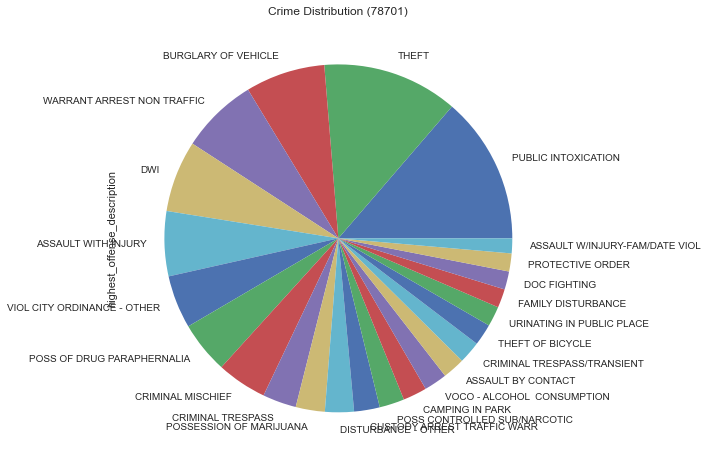

In [10]:
# Examining crime in the 78701 area
df_01 = df[df.zip_code == 78701]

# Create a dataframe for the top crime categories in the zipcode
df_01_off = df_01.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_01_off)
display(df_01.highest_offense_description.value_counts(normalize=True).head(24))
df_01_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78701)")

<a id='q3'></a>
### D. How is crime distributed in 78753 (Rundberg & N Lamar)? 

THEFT                             17232
BURGLARY OF VEHICLE               15996
FAMILY DISTURBANCE                14753
CRIMINAL MISCHIEF                  9524
THEFT BY SHOPLIFTING               7663
ASSAULT W/INJURY-FAM/DATE VIOL     7204
BURGLARY OF RESIDENCE              6087
DWI                                5136
DISTURBANCE - OTHER                4801
CUSTODY ARREST TRAFFIC WARR        4412
AUTO THEFT                         4273
HARASSMENT                         4273
POSS OF DRUG PARAPHERNALIA         3752
PUBLIC INTOXICATION                3408
ASSAULT WITH INJURY                3345
CRIMINAL TRESPASS                  3160
POSS CONTROLLED SUB/NARCOTIC       3007
RUNAWAY CHILD                      2941
WARRANT ARREST NON TRAFFIC         2834
POSSESSION OF MARIJUANA            2740
BURGLARY NON RESIDENCE             2500
VIOL CITY ORDINANCE - OTHER        1891
Name: highest_offense_description, dtype: int64
----------------------------------
THEFT                             0.0

<AxesSubplot:title={'center':'Crime Distribution (78753)'}, ylabel='highest_offense_description'>

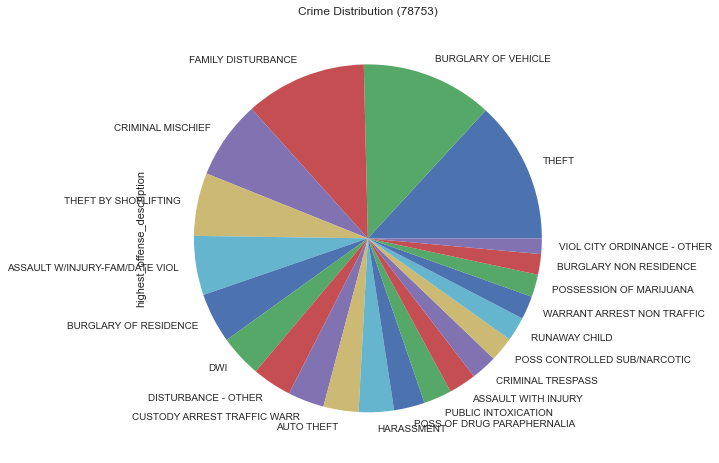

In [11]:
# Examining crime in the 78753 area
df_53 = df[df.zip_code == 78753]

# Create a dataframe for the top 10 crime categories in the zipcode
df_53_off = df_53.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
print(df_53_off)
print("----------------------------------")
print(df_53.highest_offense_description.value_counts(normalize=True).head(22))
df_53_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78753)")

<a id='q4'></a>
### E. How is crime distributed in 78741 (E Riverside/Oltorf)? 

FAMILY DISTURBANCE                20452
BURGLARY OF VEHICLE               19847
THEFT                             15638
CRIMINAL MISCHIEF                 11079
ASSAULT W/INJURY-FAM/DATE VIOL     9657
BURGLARY OF RESIDENCE              8899
PUBLIC INTOXICATION                6388
CUSTODY ARREST TRAFFIC WARR        6011
DWI                                5681
HARASSMENT                         5545
DISTURBANCE - OTHER                5182
AUTO THEFT                         4671
ASSAULT WITH INJURY                4551
CRIMINAL TRESPASS                  3935
POSS CONTROLLED SUB/NARCOTIC       3881
POSSESSION OF MARIJUANA            3795
THEFT BY SHOPLIFTING               3585
POSS OF DRUG PARAPHERNALIA         3542
WARRANT ARREST NON TRAFFIC         3448
RUNAWAY CHILD                      2799
VIOL CITY ORDINANCE - OTHER        2196
Name: highest_offense_description, dtype: int64
----------------------------------
FAMILY DISTURBANCE                0.098450
BURGLARY OF VEHICLE               

<AxesSubplot:title={'center':'Crime Distribution (78741)'}, ylabel='highest_offense_description'>

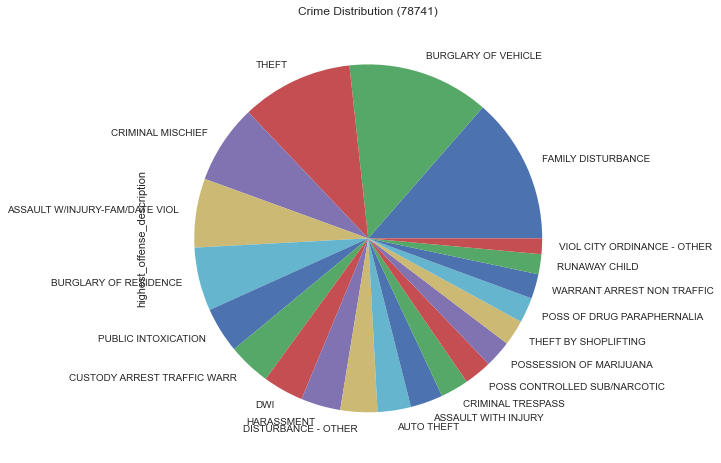

In [12]:
# Examining crime in the 78741 area (the highest amount of crime of any Austin zip code)
df_41 = df[df.zip_code == 78741]

# Create a dataframe for the top crime categories in the zipcode
df_41_off = df_41.highest_offense_description.value_counts().head(21)

# print the different crime values & then as percentages
print(df_41_off)
print("----------------------------------")
print(df_41.highest_offense_description.value_counts(normalize=True).head(21))
df_41_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78741)")

<a id='q5'></a>
### F. How is crime distributed in 78745 (far south Austin)?

FAMILY DISTURBANCE                15034
BURGLARY OF VEHICLE               14763
THEFT                             13610
CRIMINAL MISCHIEF                  8550
BURGLARY OF RESIDENCE              5877
ASSAULT W/INJURY-FAM/DATE VIOL     5774
HARASSMENT                         5161
DISTURBANCE - OTHER                4539
DWI                                4428
PUBLIC INTOXICATION                4003
CUSTODY ARREST TRAFFIC WARR        3248
BURGLARY NON RESIDENCE             2882
AUTO THEFT                         2872
ASSAULT WITH INJURY                2686
RUNAWAY CHILD                      2608
POSSESSION OF MARIJUANA            2593
WARRANT ARREST NON TRAFFIC         2108
POSS CONTROLLED SUB/NARCOTIC       2033
THEFT BY SHOPLIFTING               1995
CRIMINAL TRESPASS                  1964
IDENTITY THEFT                     1601
POSS OF DRUG PARAPHERNALIA         1520
Name: highest_offense_description, dtype: int64
----------------------------------
FAMILY DISTURBANCE                0.0

<AxesSubplot:title={'center':'Crime Distribution (78745)'}, ylabel='highest_offense_description'>

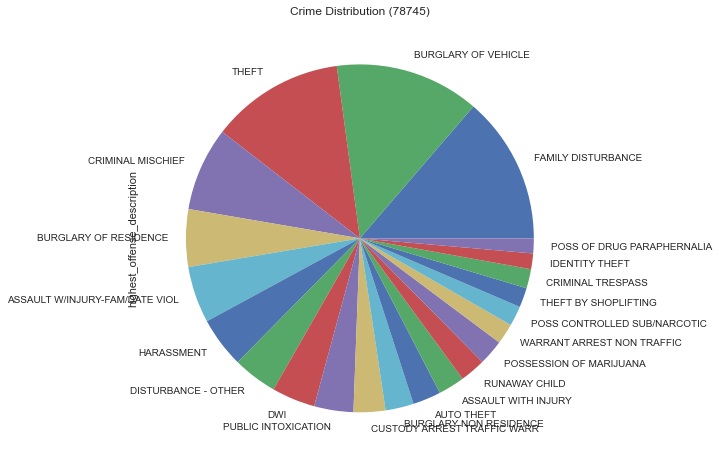

In [13]:
# Examining crime in the 78745 area
df_45 = df[df.zip_code == 78745]

# Create a dataframe for the top 10 crime categories in the zipcode
df_45_off = df_45.highest_offense_description.value_counts().head(22)

# print the different crime values & then as percentages
print(df_45_off)
print("----------------------------------")
print(df_45.highest_offense_description.value_counts(normalize=True).head(22))
df_45_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78745)")

<a id='q6'></a>
### G. How is crime distributed in 78705 (UT campus area)?

BURGLARY OF VEHICLE               8663
THEFT                             5635
CRIMINAL MISCHIEF                 4986
THEFT OF BICYCLE                  3503
PUBLIC INTOXICATION               2628
BURGLARY OF RESIDENCE             2126
WARRANT ARREST NON TRAFFIC        1549
CRIMINAL TRESPASS                 1354
AUTO THEFT                        1333
ASSAULT WITH INJURY               1259
HARASSMENT                        1222
DWI                               1212
FAMILY DISTURBANCE                1205
DISTURBANCE - OTHER               1121
BURGLARY NON RESIDENCE             884
CRIMINAL TRESPASS/TRANSIENT        868
VIOL CITY ORDINANCE - OTHER        793
GRAFFITI                           781
CUSTODY ARREST TRAFFIC WARR        780
ASSAULT W/INJURY-FAM/DATE VIOL     702
POSSESSION OF MARIJUANA            656
ASSAULT BY CONTACT                 622
Name: highest_offense_description, dtype: int64

'----------------------------------'

BURGLARY OF VEHICLE               0.150682
THEFT                             0.098014
CRIMINAL MISCHIEF                 0.086725
THEFT OF BICYCLE                  0.060930
PUBLIC INTOXICATION               0.045711
BURGLARY OF RESIDENCE             0.036979
WARRANT ARREST NON TRAFFIC        0.026943
CRIMINAL TRESPASS                 0.023551
AUTO THEFT                        0.023186
ASSAULT WITH INJURY               0.021899
HARASSMENT                        0.021255
DWI                               0.021081
FAMILY DISTURBANCE                0.020959
DISTURBANCE - OTHER               0.019498
BURGLARY NON RESIDENCE            0.015376
CRIMINAL TRESPASS/TRANSIENT       0.015098
VIOL CITY ORDINANCE - OTHER       0.013793
GRAFFITI                          0.013584
CUSTODY ARREST TRAFFIC WARR       0.013567
ASSAULT W/INJURY-FAM/DATE VIOL    0.012210
POSSESSION OF MARIJUANA           0.011410
ASSAULT BY CONTACT                0.010819
Name: highest_offense_description, dtype: float64

<AxesSubplot:title={'center':'Crime Distribution (78705)'}, ylabel='highest_offense_description'>

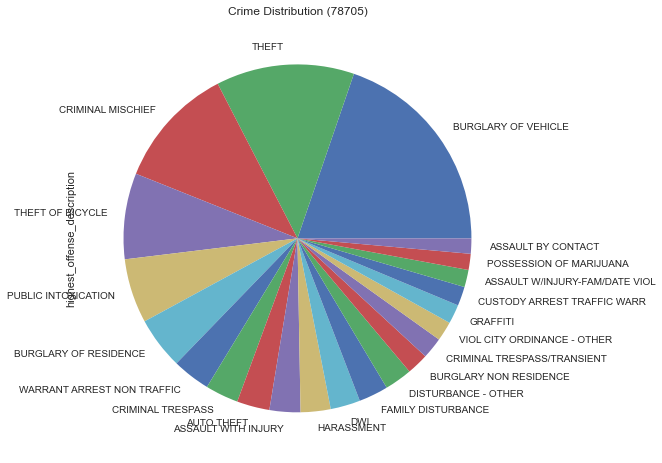

In [14]:
# Examining crime in the 78705 area
df_05 = df[df.zip_code == 78705]

# Create a dataframe for the top 10 crime categories in the zipcode
df_05_off = df_05.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
display(df_05_off)
display("----------------------------------")
display(df_05.highest_offense_description.value_counts(normalize=True).head(22))
df_05_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78705)")

<a id='q7'></a>
### H. How is crime distributed in 78746? 

BURGLARY OF VEHICLE               5403
THEFT                             5097
THEFT BY SHOPLIFTING              2546
CRIMINAL MISCHIEF                 1275
DWI                                881
FAMILY DISTURBANCE                 763
VIOL CITY ORDINANCE - OTHER        652
HARASSMENT                         629
AUTO THEFT                         607
BURGLARY OF RESIDENCE              522
THEFT FROM PERSON                  462
IDENTITY THEFT                     434
DISTURBANCE - OTHER                433
BURGLARY NON RESIDENCE             357
ASSAULT W/INJURY-FAM/DATE VIOL     339
CRED CARD ABUSE - OTHER            326
PUBLIC INTOXICATION                321
POSSESSION OF MARIJUANA            298
FRAUD - OTHER                      280
SUSPICIOUS PERSON                  258
CUSTODY ARREST TRAFFIC WARR        247
WARRANT ARREST NON TRAFFIC         223
ASSAULT WITH INJURY                198
VIOL WATER SAFETY ACT              195
Name: highest_offense_description, dtype: int64

BURGLARY OF VEHICLE               0.191290
THEFT                             0.180457
THEFT BY SHOPLIFTING              0.090140
CRIMINAL MISCHIEF                 0.045141
DWI                               0.031191
FAMILY DISTURBANCE                0.027014
VIOL CITY ORDINANCE - OTHER       0.023084
HARASSMENT                        0.022269
AUTO THEFT                        0.021491
BURGLARY OF RESIDENCE             0.018481
THEFT FROM PERSON                 0.016357
IDENTITY THEFT                    0.015366
DISTURBANCE - OTHER               0.015330
BURGLARY NON RESIDENCE            0.012639
ASSAULT W/INJURY-FAM/DATE VIOL    0.012002
CRED CARD ABUSE - OTHER           0.011542
PUBLIC INTOXICATION               0.011365
POSSESSION OF MARIJUANA           0.010551
FRAUD - OTHER                     0.009913
SUSPICIOUS PERSON                 0.009134
CUSTODY ARREST TRAFFIC WARR       0.008745
WARRANT ARREST NON TRAFFIC        0.007895
ASSAULT WITH INJURY               0.007010
VIOL WATER 

<AxesSubplot:title={'center':'Crime Distribution (78746)'}, ylabel='highest_offense_description'>

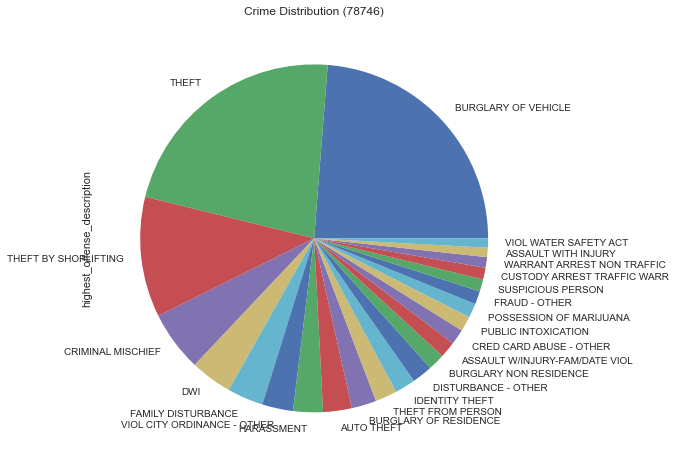

In [15]:
# Examining crime in the 78701 area
df_46 = df[df.zip_code == 78746]

# Create a dataframe for the top crime categories in the zipcode
df_46_off = df_46.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_46_off)
display(df_46.highest_offense_description.value_counts(normalize=True).head(24))
df_46_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78746)")

<a id='q8'></a>
### I. How are violent crimes, in particular murder, capital murder, armed robbery, aggrivated assault, and rape distributed? 

In [16]:
# Creating separate dataframes for overall & violent crime
df_viol = df.query(
    'highest_offense_description == ["AGG ASSAULT", "AGG ROBBERY/DEADLY WEAPON", "CAPITAL MURDER", "MURDER", "RAPE"]'
)
df_viol_mur = df.query('highest_offense_description == ["MURDER", "CAPITAL MURDER"]')
df_agg_asslt = df[df.highest_offense_description == "AGG ASSAULT"]
df_agg_robbery = df[df.highest_offense_description == "AGG ROBBERY/DEADLY WEAPON"]

# Creating yearly dataframes
# Annual overall crime
df_17 = df[df.year == 2017]
df_18 = df[df.year == 2018]
df_19 = df[df.year == 2019]
df_20 = df[df.year == 2020]

# Annual violent crime
df_viol_17 = df_viol[df_viol.year == 2017]
df_viol_18 = df_viol[df_viol.year == 2018]
df_viol_19 = df_viol[df_viol.year == 2019]
df_viol_20 = df_viol[df_viol.year == 2020]

# Annual murders
df_viol_mur_17 = df_viol_mur[df_viol_mur.year == 2017]
df_viol_mur_18 = df_viol_mur[df_viol_mur.year == 2018]
df_viol_mur_19 = df_viol_mur[df_viol_mur.year == 2019]
df_viol_mur_20 = df_viol_mur[df_viol_mur.year == 2020]

78741.0    0.130643
78753.0    0.099373
78758.0    0.093946
78723.0    0.074852
78701.0    0.074546
78702.0    0.073970
78745.0    0.057758
78752.0    0.052433
78744.0    0.051993
78704.0    0.048330
78721.0    0.027438
78724.0    0.024555
78705.0    0.021502
78757.0    0.020722
78748.0    0.017500
78751.0    0.017060
78759.0    0.013668
78722.0    0.009632
78754.0    0.008343
78727.0    0.007970
78749.0    0.007868
78617.0    0.007699
78729.0    0.007122
78750.0    0.005732
78731.0    0.005257
Name: zip_code, dtype: float64

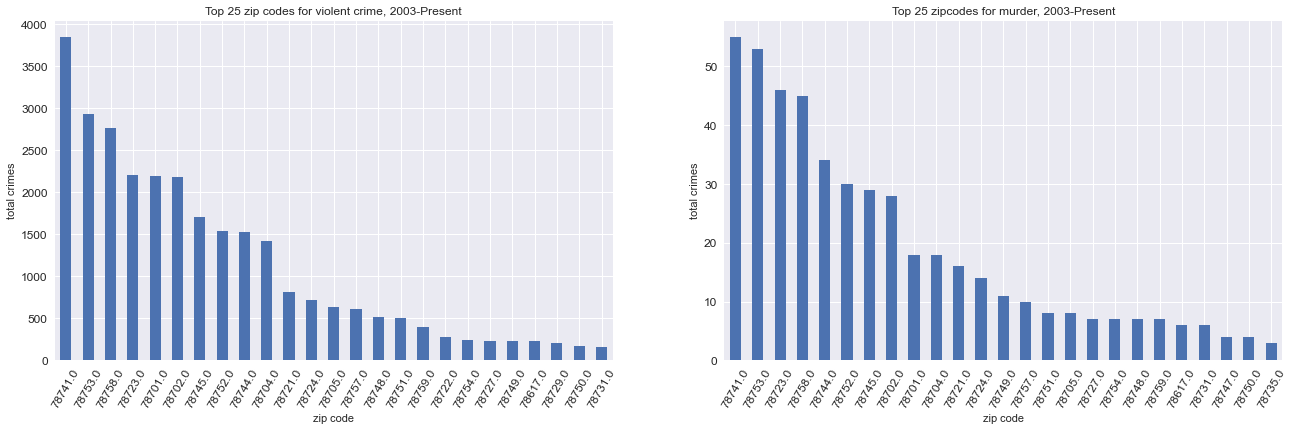

highest_offense_description,AGG ASSAULT,AGG ROBBERY/DEADLY WEAPON,CAPITAL MURDER,MURDER,RAPE
zip_code,,,,,
78610.0,1,0,0,0,0
78613.0,15,11,0,1,6
78617.0,122,62,0,6,37
78621.0,1,0,0,0,0
78634.0,1,0,0,0,0
78652.0,2,0,0,0,0
78653.0,10,3,0,1,1
78660.0,65,28,0,2,17
78664.0,3,0,0,0,0


<Figure size 432x288 with 0 Axes>

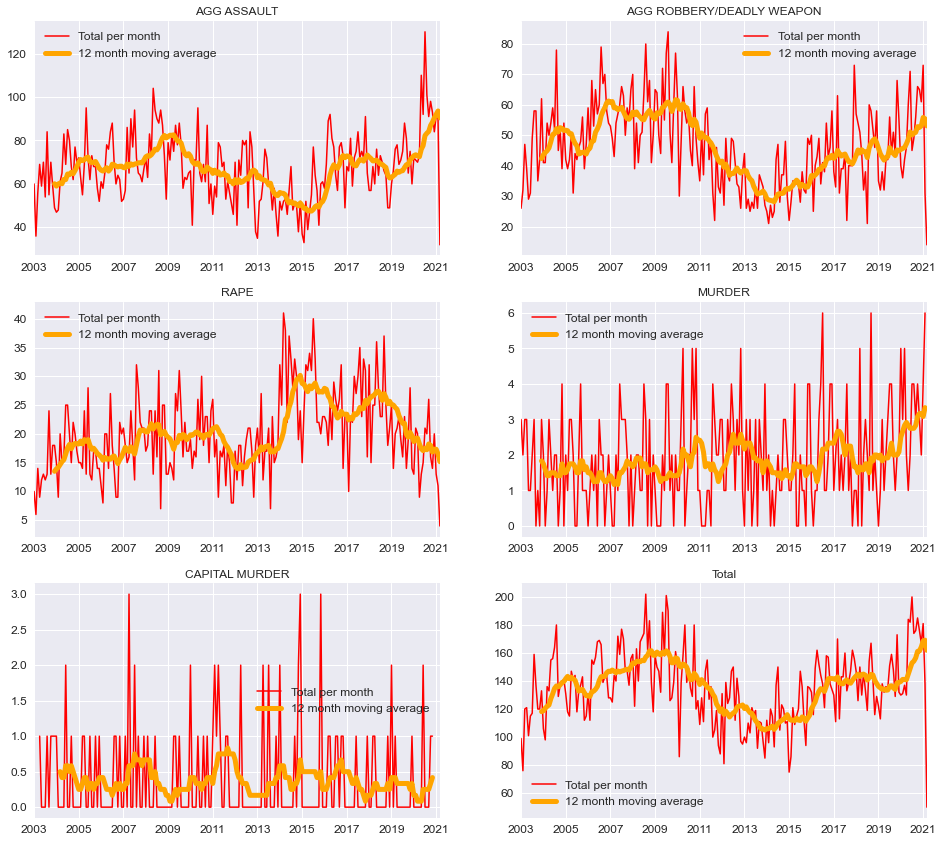

In [17]:
display(df_viol.zip_code.value_counts(normalize=True).head(25))

fig, axs = plt.subplots(figsize=(22, 6.25), ncols=2)
df_viol.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zip codes for violent crime, 2003-Present",
    xlabel="zip code",
    ylabel="total crimes",
    fontsize=12,
    rot=60,
    ax=axs[0],
)
df_viol_mur.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zipcodes for murder, 2003-Present",
    xlabel="zip code",
    ylabel="total crimes",
    fontsize=12,
    rot=60,
    ax=axs[1],
)
plt.show()

viol_freq = pd.crosstab(df_viol.zip_code, df_viol.highest_offense_description)
mur_freq = pd.crosstab(df_viol_mur.zip_code, df_viol_mur.highest_offense_description)
display(viol_freq)

monthly = pd.DataFrame(
    df_viol[df_viol["highest_offense_description"] == "AGG ASSAULT"]
    .resample("M")
    .size()
)
monthly.columns = ["AGG ASSAULT"]

for i in df_viol["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df_viol[df_viol["highest_offense_description"] == i].resample("M").size()
    )

monthly["Total"] = monthly.sum(axis=1)

crimeTypes = monthly.columns

plt.figure(1)
plt.figure(figsize=(16, 25))

i = 521
for eachCrime in crimeTypes:
    plt.subplot(i)
    monthly[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12 month moving average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1

### J. Distribution of violent crime and murders across council districts, APD Districts, and APD sectors 

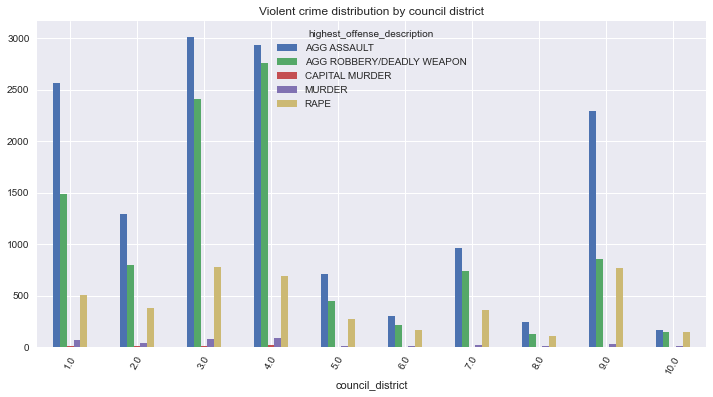

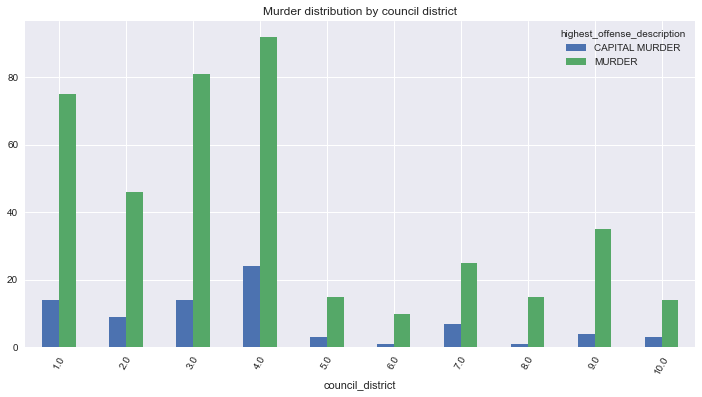

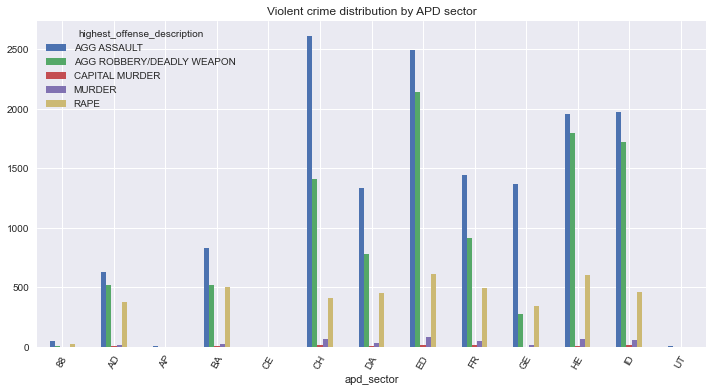

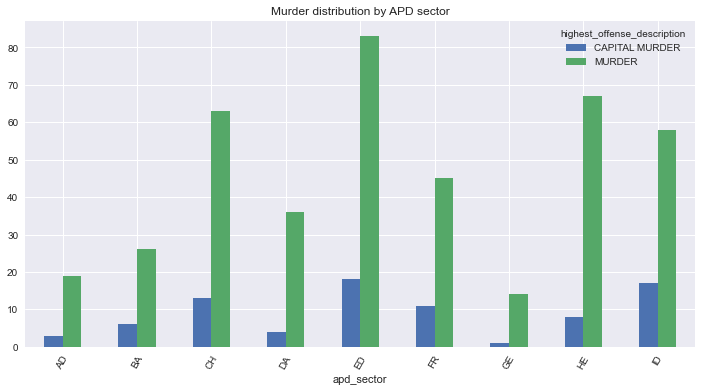

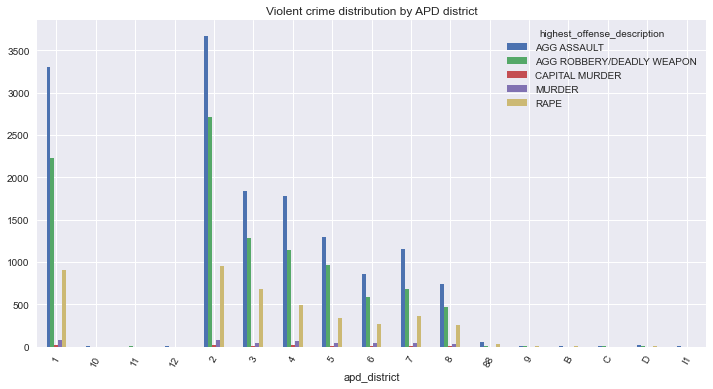

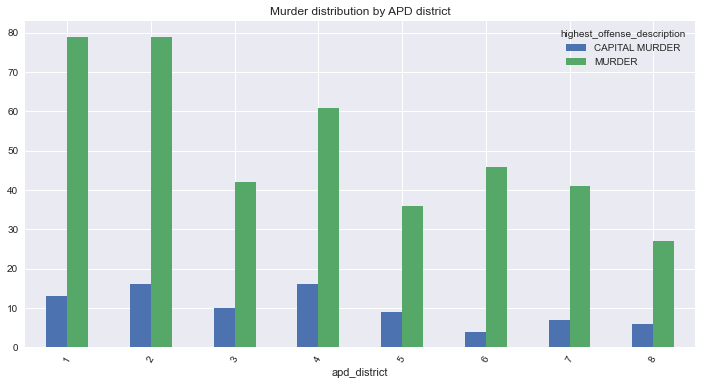

In [18]:
pd.crosstab(df_viol.council_district, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by council district"
)
plt.show()

pd.crosstab(
    df_viol_mur.council_district, df_viol_mur.highest_offense_description
).plot.bar(figsize=(12, 6), rot=60, title="Murder distribution by council district")
plt.show()

pd.crosstab(df_viol.apd_sector, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol_mur.apd_sector, df_viol_mur.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Murder distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol.apd_district, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by APD district"
)
plt.show()

pd.crosstab(df_viol_mur.apd_district, df_viol_mur.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Murder distribution by APD district"
)
plt.show()

### K. Violent crime and murder distribution by location type

highest_offense_description,AGG ASSAULT,AGG ROBBERY/DEADLY WEAPON,CAPITAL MURDER,MURDER,RAPE
location_type,,,,,
ABANDONED/CONDEMNED STRUCTURE,13,7,0,1,4
AMUSEMENT PARK,0,2,0,0,0
ARENA / STADIUM / FAIRGROUNDS / COLISEUM,2,0,0,0,0
ATM SEPARATE FROM BANK,1,3,0,0,0
AUTO DEALERSHIP NEW / USED,10,2,0,0,1
BANKS / SAVINGS & LOAN,5,134,0,1,1
BAR / NIGHT CLUB,661,46,2,7,78
CAMP / CAMPGROUND,21,2,0,0,3
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE,20,5,1,0,7


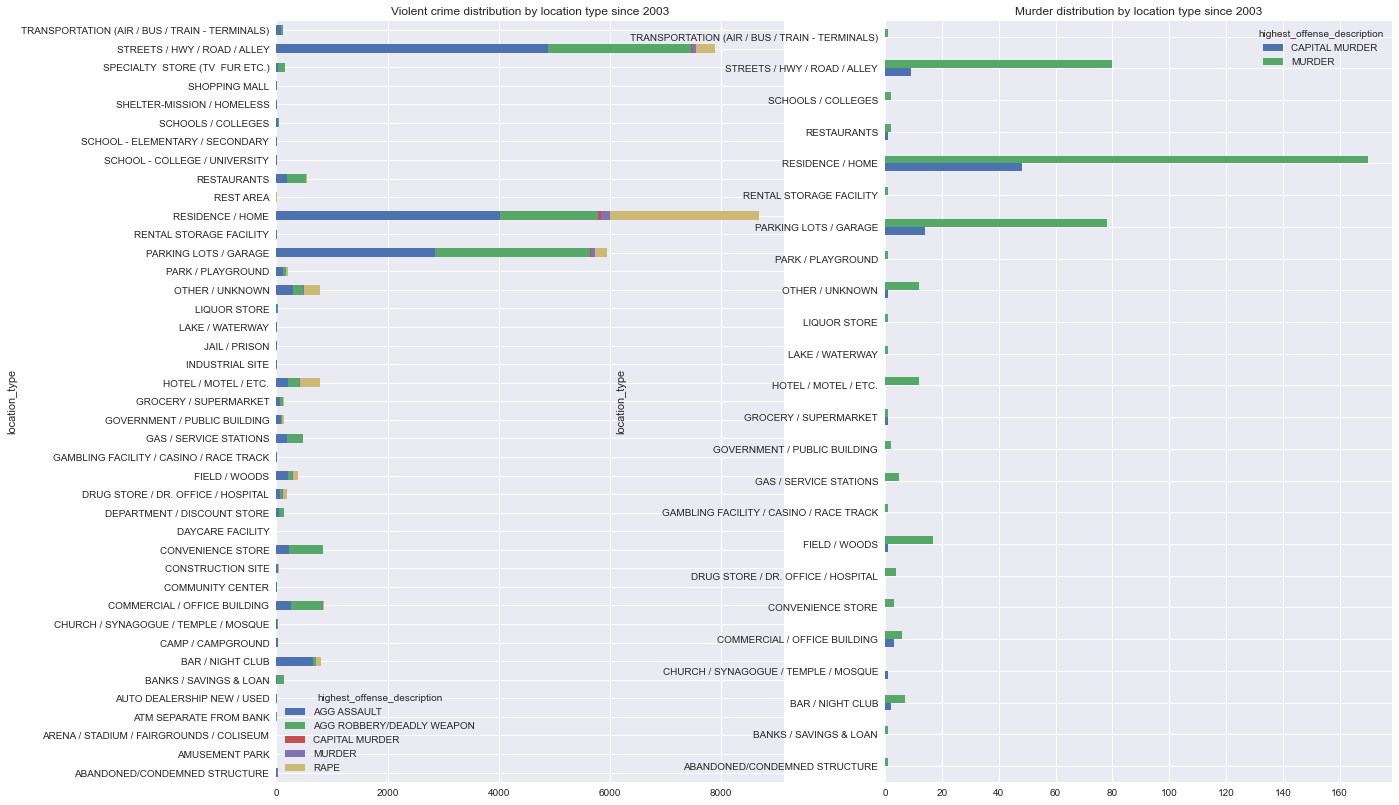

In [19]:
viol_loc = pd.crosstab(df_viol.location_type, df_viol.highest_offense_description)
display(viol_loc)
mur_loc = pd.crosstab(
    df_viol_mur.location_type, df_viol_mur.highest_offense_description
)

fig, axs = plt.subplots(figsize=(20, 14), ncols=2)
viol_loc.plot.barh(
    title="Violent crime distribution by location type since 2003",
    ax=axs[0],
    stacked=True,
)
mur_loc.plot.barh(title="Murder distribution by location type since 2003", ax=axs[1])
plt.show()

<a id='q9'></a>
### L. How does violent crime appear on the map?

** Note: Rape incidents provide no location coordinates therefore cannot be shown on a map. **

#### Aggravated assault 

In [20]:
agg_asslt_coords_heat = df_agg_asslt[
    (df_agg_asslt["latitude"].isnull() == False)
    & (df_agg_asslt["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(agg_asslt_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="agg_asslt_heatmap.html")

k

#### Armed robbery 

In [21]:
agg_robbery_coords_heat = df_agg_robbery[
    (df_agg_robbery["latitude"].isnull() == False)
    & (df_agg_robbery["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(
        agg_robbery_coords_heat[["latitude", "longitude"]].values, radius=15
    )
)

k.save(outfile="agg_robbery_heatmap.html")

k

<a id='q8'></a>
#### Murder  

In [22]:
mur_coords_heat = df_viol_mur[
    (df_viol_mur["latitude"].isnull() == False)
    & (df_viol_mur["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(mur_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="mur_heatmap.html")

k

<a id='q10'></a>
### M. Are there any addresses where violent crime and murder occurs frequently?

In [23]:
df.address.value_counts().head(50)

4110 GUADALUPE ST                 11534
1030 NORWOOD PARK BLVD             9211
2901 S CAPITAL OF TEXAS HWY NB     8115
3600 PRESIDENTIAL BLVD             7351
500 E 7TH ST                       6111
1000 E 41ST ST                     5817
3708 S 2ND ST                      5254
2508 E RIVERSIDE DR                4827
11200 LAKELINE MALL DR             4501
9300 S IH 35 SVRD SB               4064
715 E 8TH ST                       4001
9414 N LAMAR BLVD                  3867
1137 GUNTER ST                     3202
710 E BEN WHITE BLVD SVRD WB       3195
6001 AIRPORT BLVD                  2923
12900 N IH 35 SVRD SB              2807
5800 TECHNI CENTER DR              2743
5901 AIRPORT BLVD                  2718
2701 E 7TH ST                      2711
6118 FAIRWAY ST                    2667
1300 CROSSING PL                   2631
1515 WICKERSHAM LN                 2441
6409 SPRINGDALE RD                 2436
2400 S CONGRESS AVE                2435
601 E 15TH ST                      2362


In [24]:
# Show addresses with 50 or more reported violent crimes
df_viol.address.value_counts().head(13)

500 E 7TH ST                83
9515 N LAMAR BLVD           66
1700 BURTON DR              63
6409 SPRINGDALE RD          59
00 BLOCK UNKNOWN            59
9601 MIDDLE FISKVILLE RD    58
900 BLOCK E 32ND ST         55
1030 NORWOOD PARK BLVD      53
1071 CLAYTON LN             53
9200 NORTH PLZ              53
6103 MANOR RD               52
1137 GUNTER ST              51
2237 E RIVERSIDE DR         51
Name: address, dtype: int64

In [25]:
# Show addresses with 2 or more reported murders
df_viol_mur.address.value_counts().head(30)

6407 SPRINGDALE RD           3
8610 N LAMAR BLVD            3
4700 E RIVERSIDE DR          3
8800 N IH 35 SVRD SB         3
6409 SPRINGDALE RD           3
1050 SPRINGDALE RD           2
7000 DECKER LN               2
8912 N LAMAR BLVD            2
605 MASTERSON PASS           2
601 E 15TH ST                2
9220 N IH 35 SVRD SB         2
833 FAIRFIELD DR             2
2915 S IH 35 SVRD NB         2
9010 GALEWOOD DR             2
1137 GUNTER ST               2
744 W WILLIAM CANNON DR      2
10610 MORADO CIR             2
6600 ED BLUESTEIN BLVD SB    2
9200 NORTH PLZ               2
815 W SLAUGHTER LN           2
2501 ANKEN DR                2
2713 S CONGRESS AVE          2
1711 RUTLAND DR              2
2508 E RIVERSIDE DR          2
9601 MIDDLE FISKVILLE RD     2
201 W 5TH ST                 2
2400 WICKERSHAM LN           2
10503 N LAMAR BLVD           2
8225 SAM RAYBURN DR          2
6118 FAIRWAY ST              2
Name: address, dtype: int64

In [26]:
df_clean = df.copy()
df_clean.to_csv("df_clean.csv")

df_17.to_csv("df_17.csv")
df_18.to_csv("df_18.csv")
df_19.to_csv("df_19.csv")
df_20.to_csv("df_20.csv")

df_viol_17.to_csv("df_viol_17.csv")
df_viol_18.to_csv("df_viol_18.csv")
df_viol_19.to_csv("df_viol_19.csv")
df_viol_20.to_csv("df_viol_20.csv")

df_viol_mur_17.to_csv("df_viol_mur_17.csv")
df_viol_mur_18.to_csv("df_viol_mur_18.csv")
df_viol_mur_19.to_csv("df_viol_mur_19.csv")
df_viol_mur_20.to_csv("df_viol_mur_20.csv")

df_viol.to_csv("df_viol.csv")
df_viol_mur.to_csv("df_viol_mur.csv")

df_01.to_csv("df_01.csv")
df_53.to_csv("df_53.csv")
df_41.to_csv("df_41.csv")
df_45.to_csv("df_45.csv")
df_05.to_csv("df_05.csv")
df_46.to_csv("df_46.csv")